# Installing Hub

In [ ]:
!pip3 install hub --quiet
import os 
os.kill(os.getpid(), 9) 

     |████████████████████████████████| 255 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 1.8 MB 64.2 MB/s 
     |████████████████████████████████| 131 kB 54.1 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 551 kB 61.1 MB/s 
     |████████████████████████████████| 5.8 MB 20.5 MB/s 
     |████████████████████████████████| 81 kB 6.9 MB/s 
     |████████████████████████████████| 3.0 MB 26.9 MB/s 
     |████████████████████████████████| 152 kB 57.0 MB/s 
     |████████████████████████████████| 105 kB 51.7 MB/s 
     |████████████████████████████████| 256 kB 45.9 MB/s 
     |████████████████████████████████| 75 kB 3.5 MB/s 
     |████████████████████████████████| 109 kB 48.3 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 8.5 MB 40.0 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
     |████████

# Download raw dataset

In [1]:
from IPython.display import clear_output
from google.colab import files

In [ ]:
files = ['optdigits.names',
        'optdigits.tes',
        'optdigits.tra',
        'readme.txt']

In [ ]:
for file in files:
    path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/' + file
    !wget {path}

clear_output()

In [4]:
import hub
from PIL import Image 
import numpy as np 
import os
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
#@title Login to ActiveLoop

%env BUGGER_OFF=True
!activeloop login -u username -p password
!activeloop reporting --off

env: BUGGER_OFF=True
Successfully logged in to Activeloop.


# Creating dataset on hub

**Activeloop API** : https://docs.activeloop.ai/api-basics

In [20]:
def load_csv(filename):
    images = []
    labels = []
    with open(filename, 'r') as file:
        lines = [line.split(',') for line in file.readlines()]
        for line in lines:
            images.append(np.array(line[:-1], dtype=np.uint8).reshape(8,8))
            labels.append(np.uint32(line[-1]))

    return(images, labels)

In [14]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [36]:
filename_path = 'hub://activeloop/optical-handwritten-digits-train'
ds = hub.dataset(filename_path)

with ds: 
    ds.create_tensor('images', htype='image', sample_compression=None)
    ds.create_tensor('labels', htype = 'class_label', class_names = class_names)

    images, labels = load_csv('optdigits.tra')
    ds.images.extend(images)
    ds.labels.extend(labels)

Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/activeloop/optical-handwritten-digits-train.


In [37]:
filename_path = 'hub://activeloop/optical-handwritten-digits-test'
ds = hub.dataset(filename_path)

with ds: 
    ds.create_tensor('images', htype='image', sample_compression=None)
    ds.create_tensor('labels', htype = 'class_label', class_names = class_names)

    images, labels = load_csv('optdigits.tes')
    ds.images.extend(images)
    ds.labels.extend(labels)

Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/activeloop/optical-handwritten-digits-test.


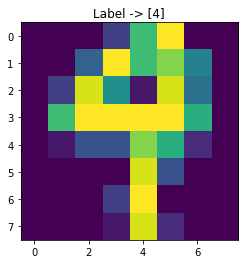

In [35]:
index = 3
image = ds.images[index].numpy()
label = ds.labels[index].numpy()
plt.imshow(image)
plt.title(f'Label -> {label}')
plt.show()

# Testing dataset from Hub

In [39]:
train_path = 'hub://activeloop/optical-handwritten-digits-train'
test_path = 'hub://activeloop/optical-handwritten-digits-test'

hub://activeloop/optical-handwritten-digits-train loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/optical-handwritten-digits-train.


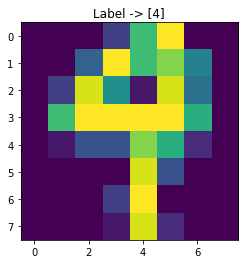

In [40]:
ds = hub.dataset(train_path)
index = 3
image = ds.images[index].numpy()
label = ds.labels[index].numpy()
plt.imshow(image)
plt.title(f'Label -> {label}')
plt.show()

hub://activeloop/optical-handwritten-digits-test loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/optical-handwritten-digits-test.


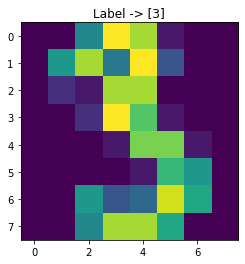

In [41]:
ds = hub.dataset(test_path)
index = 3
image = ds.images[index].numpy()
label = ds.labels[index].numpy()
plt.imshow(image)
plt.title(f'Label -> {label}')
plt.show()